#Logistic Regression:
1. Design Model (input, output size, forward pass)
2. Construct loss & optimizer
3. Training Loop:
- forward pass: compute prediction and loss
- backward pass: gradients
- update weights

#Importing Libraries:

In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler #For Feature Scaling
from sklearn.model_selection import train_test_split #For Splitting data into training and test set
import matplotlib.pyplot as plt

#Data Preparation:

In [2]:
#loading dataset
bc = datasets.load_breast_cancer()

In [3]:
X,y = bc.data, bc.target

n_samples, n_features = X.shape
print(f"Samples: {n_samples}")
print(f'Features: {n_features}')

Samples: 569
Features: 30


In [4]:
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)

In [5]:
#Feature Scaling
sc = StandardScaler() #for scaling features to have zero mean and unit variance (variance normalized to 1)

X_train = sc.fit_transform(X_train) #calculates mean and variance and applies it
X_test = sc.transform(X_test) #applies the same calculated transformation

In [6]:
#Converting to torch tensors:
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

In [7]:
#Reshaping y_train
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

#Design Model:

In [8]:
# f = w.x + b
# Using sigmoid function

class LogisticRegression(nn.Module):

  def __init__(self, n_input_features):
    super(LogisticRegression, self).__init__()

    #Layers:
    self.Linear = nn.Linear(n_input_features, 1) #Output size = 1

  def forward(self, x):
    y_predicted = torch.sigmoid(self.Linear(x)) #Using sigmoid activation function
    return y_predicted

In [9]:
model = LogisticRegression(n_features)

#Loss & Optimizer:

In [10]:
criterion = nn.BCELoss() #Using Binary Cross Entropy Loss

learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate) #Using stochastic Gradient Descent

#Training Loop:

In [11]:
num_epochs = 100

In [12]:
losses = []

for epoch in range(num_epochs):
  #forward pass and loss
  y_predicted = model(X_train)

  loss = criterion(y_predicted, y_train)

  losses.append(loss.detach().numpy())

  #backward pass
  loss.backward()

  #update weights
  optimizer.step()

  #empty the gradients
  optimizer.zero_grad()

  if (epoch + 1) % 10 == 0:
    print(f'epoch: {epoch + 1}, loss: {loss.item():.4f}')

epoch: 10, loss: 0.4822
epoch: 20, loss: 0.4081
epoch: 30, loss: 0.3592
epoch: 40, loss: 0.3246
epoch: 50, loss: 0.2987
epoch: 60, loss: 0.2786
epoch: 70, loss: 0.2625
epoch: 80, loss: 0.2492
epoch: 90, loss: 0.2380
epoch: 100, loss: 0.2285


#Model Evaluation:

In [13]:
#Model Evaluation

#model evaluation should not be a part of computational graph
#therefore using torch.no_grad()

with torch.no_grad():
  y_predicted = model(X_test)

  #sigmoid function return a value b/w 0 & 1
  y_predicted_cls = y_predicted.round()
  #if value < .5 then class is 0,
  #if value >= .5 then class is 1

  #calculating accuracy
  acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])

  print(f'accuracy: {acc:.4f}')

accuracy: 0.9649


#Plot

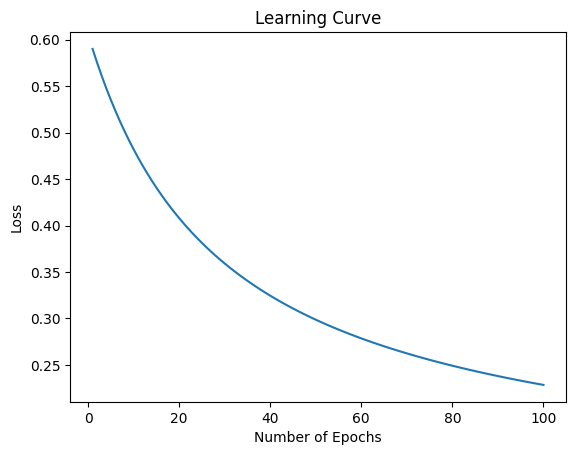

In [14]:
#num_epochs is an integer and losses is a list with 100 elements
#dimensions must be same for plotting
#Creates an epoch list from 1 to 100
epochs_list = range(1, num_epochs+1)

plt.plot(epochs_list, losses)
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.show()